## Homework
The goal of this homework is to train a simple model for predicting the duration of a ride - similar to what we did in this module.

### Q1. Downloading the data
[The data link address of NYC Dataset](https://www1.nyc.gov/site/tlc/about/tlc-trip-record-data.page)

Read the data for January. How many columns are there?

In [45]:
# import libraries
import pandas as pd
import numpy as np
# import visualization library
import matplotlib.pyplot as plt
import seaborn as sns

In [46]:
# This is January data of NYC Dataset
nyc_df_train = pd.read_parquet("../data/yellow_tripdata_2023-01.parquet")

In [47]:
print("Number of columns are: ", nyc_df_train.shape[1])

Number of columns are:  19


### Q2. Computing duration
Now let's compute the `duration` variable. It should contain the duration of a ride in minutes.
What's the standard deviation of the trips duration in January?

Let's first check the info of the dataframe to see the type of `tpep_dropoff_datetime` and `tpep_pickup_datetime` columns

In [48]:
nyc_df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3066766 entries, 0 to 3066765
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee           

Since we will find the `duration` of the trips in minutes, the date time type is what we are looking for. We don't need to convert it to datetime type because the tpep_dropoff_datetime and tpep_pickup_datetime columns are already in datetime type. 

In [49]:
# We need to create a new column named duration and to calculate the duration of the trips, first, we need to subtract the dropoff time from the pickup time
nyc_df_train["duration"] = nyc_df_train["tpep_dropoff_datetime"]-nyc_df_train["tpep_pickup_datetime"]
# secondly, we need to convert the duration into minutes by dividing total seconds of the duration by 60
nyc_df_train.duration = nyc_df_train.duration.apply(lambda td: td.total_seconds()/60)
# let's see the first 5 rows of the dataframe
nyc_df_train.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,duration
0,2,2023-01-01 00:32:10,2023-01-01 00:40:36,1.0,0.97,1.0,N,161,141,2,9.3,1.00,0.5,0.00,0.0,1.0,14.30,2.5,0.00,8.433333
1,2,2023-01-01 00:55:08,2023-01-01 01:01:27,1.0,1.10,1.0,N,43,237,1,7.9,1.00,0.5,4.00,0.0,1.0,16.90,2.5,0.00,6.316667
2,2,2023-01-01 00:25:04,2023-01-01 00:37:49,1.0,2.51,1.0,N,48,238,1,14.9,1.00,0.5,15.00,0.0,1.0,34.90,2.5,0.00,12.750000
3,1,2023-01-01 00:03:48,2023-01-01 00:13:25,0.0,1.90,1.0,N,138,7,1,12.1,7.25,0.5,0.00,0.0,1.0,20.85,0.0,1.25,9.616667
4,2,2023-01-01 00:10:29,2023-01-01 00:21:19,1.0,1.43,1.0,N,107,79,1,11.4,1.00,0.5,3.28,0.0,1.0,19.68,2.5,0.00,10.833333


In [50]:
import math
"""
The calculation of standard deviation is described as;
std = sqrt(mean(x)) ,
where x = abs(a - a.mean())**2 . The average squared deviation is typically calculated as x.sum() / N , where N = len(x)
"""

# to calculate the standard deviation, we need to calculate the squared deviation.
x = abs(nyc_df_train.duration-nyc_df_train.duration.mean())**2
# then average squared deviation is calculated as x.sum() / N which is the standard deviation
standard_deviation = math.sqrt(x.sum() / len(x))
print(f'The standard deviation of the trips duration in January is(by calculating the defined formula): {standard_deviation}')

# we can also choose the easy way and use built-in function
print(f'The standard deviation of the trips duration in January is(by built-in function): {nyc_df_train.duration.std()}')

# 42.59 is the right answer for this question

The standard deviation of the trips duration in January is(by calculating the defined formula): 42.59434429744777
The standard deviation of the trips duration in January is(by built-in function): 42.59435124195458


### Q3. Dropping outliers

Next, we need to check the distribution of the `duration` variable. There are some outliers. Let's remove them and keep only the records where the duration was between 1 and 60 minutes (inclusive).

What fraction of the records left after you dropped the outliers?

In [51]:
# The statistics of the duration column is:
nyc_df_train.duration.describe()

count    3.066766e+06
mean     1.566900e+01
std      4.259435e+01
min     -2.920000e+01
25%      7.116667e+00
50%      1.151667e+01
75%      1.830000e+01
max      1.002918e+04
Name: duration, dtype: float64

In [52]:
# Do we have null values in duration records? No
nyc_df_train.isnull().sum()

VendorID                     0
tpep_pickup_datetime         0
tpep_dropoff_datetime        0
passenger_count          71743
trip_distance                0
RatecodeID               71743
store_and_fwd_flag       71743
PULocationID                 0
DOLocationID                 0
payment_type                 0
fare_amount                  0
extra                        0
mta_tax                      0
tip_amount                   0
tolls_amount                 0
improvement_surcharge        0
total_amount                 0
congestion_surcharge     71743
airport_fee              71743
duration                     0
dtype: int64

<Axes: xlabel='duration', ylabel='Count'>

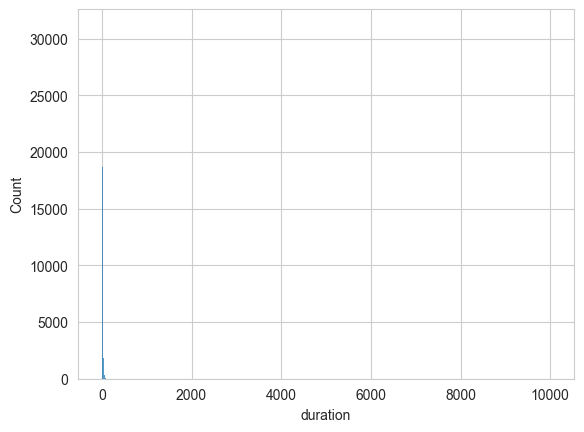

In [53]:
# One of the best ways to describe a variable is to report the values that appear in the dataset and how many times each value appears. This is called distribution of the variable.
sns.histplot(nyc_df_train.duration)

Axes(0.125,0.11;0.775x0.77)
98.1220282212598 of the records left, after dropping outliers


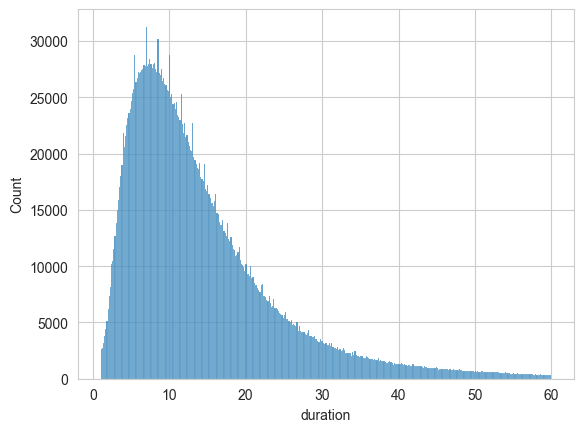

In [54]:
# Let's calculate the fraction of the records left after dropping outliers.
# Save all records before dropping outliers
before_dropping_outliers = nyc_df_train.shape[0]
# The duration data between 1 and 60 minutes is considered as a reasonable value for the duration of a trip. So, we will filter the data between 1 and 60 minutes.
nyc_dataframe = nyc_df_train[(nyc_df_train.duration >= 1) & (nyc_df_train.duration <= 60)]
# Save all records after dropping outliers
after_dropping_outliers = nyc_dataframe.shape[0]

# Calculate the fraction of the records left after dropping outliers by dividing the number of records after dropping outliers to the number of records before dropping outliers and multiply by 100 to get the percentage.
fraction_left = (after_dropping_outliers / before_dropping_outliers)*100

# Let's look at the duration's hist plot, after dropping outliers
print(sns.histplot(nyc_dataframe.duration))

print(f"{fraction_left} of the records left, after dropping outliers")


### Q4. One-hot encoding

Let's apply one-hot encoding to the pickup and dropoff location IDs. We'll use only these two features for our model.
* Turn the dataframe into a list of dictionaries (remember to re-cast the ids to strings - otherwise it will label encode them)
* Fit a dictionary vectorizer
* Get a feature matrix from it

What's the dimensionality of this matrix (number of columns)?
* 2
* 155
* 345
* 515
* 715

#### 1. Turn the dataframe into a list of dictionaries

In [57]:
from sklearn.feature_extraction import DictVectorizer

# initialize the Dictionary Vectorizer
dv = DictVectorizer()

# We will apply one-hot encoding to the pickup and dropoff location IDs.
categorical_columns = ['PULocationID', 'DOLocationID']

# Create a copy of the DataFrame columns to cast
nyc_dataframe_copy = nyc_dataframe[categorical_columns].copy()

# Perform the type casting on the copied columns
nyc_dataframe_copy = nyc_dataframe_copy.astype(str)

# Replace the original columns with the cast columns
nyc_dataframe.loc[:, categorical_columns] = nyc_dataframe_copy

# and turn selected columns into a list of dictionaries by using to_dict() method with orient='records' parameter.
train_dicts = nyc_dataframe[categorical_columns].to_dict(orient='records')

In [58]:
# train_dicts contains two categorical columns: 'PULocationID' and 'DOLocationID'. Let's see the first 5 rows of the list of dictionaries. 
train_dicts[:5]

[{'PULocationID': '161', 'DOLocationID': '141'},
 {'PULocationID': '43', 'DOLocationID': '237'},
 {'PULocationID': '48', 'DOLocationID': '238'},
 {'PULocationID': '138', 'DOLocationID': '7'},
 {'PULocationID': '107', 'DOLocationID': '79'}]

#### 2. Fit a dictionary vectorizer

In [59]:
X_train = dv.fit_transform(train_dicts)

When you fit the `DictVectorizer` and transform the `train_dicts`, each unique value in these columns will be represented as a binary feature in the resulting matrix `X_train`. The number of columns in this matrix will be equal to the number of unique values in these two columns combined.

In [60]:
# Let's see the first 5 rows of the feature matrix. The below sparse matrix represents the one-hot encoded features.
X_train[:5].toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [61]:
# We can also inspect the feature names created by DictVectorizer to understand the exact mapping of columns to categories.
print(dv.get_feature_names_out())

['DOLocationID=1' 'DOLocationID=10' 'DOLocationID=100' 'DOLocationID=101'
 'DOLocationID=102' 'DOLocationID=106' 'DOLocationID=107'
 'DOLocationID=108' 'DOLocationID=109' 'DOLocationID=11'
 'DOLocationID=111' 'DOLocationID=112' 'DOLocationID=113'
 'DOLocationID=114' 'DOLocationID=115' 'DOLocationID=116'
 'DOLocationID=117' 'DOLocationID=118' 'DOLocationID=119'
 'DOLocationID=12' 'DOLocationID=120' 'DOLocationID=121'
 'DOLocationID=122' 'DOLocationID=123' 'DOLocationID=124'
 'DOLocationID=125' 'DOLocationID=126' 'DOLocationID=127'
 'DOLocationID=128' 'DOLocationID=129' 'DOLocationID=13'
 'DOLocationID=130' 'DOLocationID=131' 'DOLocationID=132'
 'DOLocationID=133' 'DOLocationID=134' 'DOLocationID=135'
 'DOLocationID=136' 'DOLocationID=137' 'DOLocationID=138'
 'DOLocationID=139' 'DOLocationID=14' 'DOLocationID=140'
 'DOLocationID=141' 'DOLocationID=142' 'DOLocationID=143'
 'DOLocationID=144' 'DOLocationID=145' 'DOLocationID=146'
 'DOLocationID=147' 'DOLocationID=148' 'DOLocationID=149'
 '

#### 3. Get a feature matrix from it

In [62]:
print(f"The dimensionality of this matrix is, {X_train.shape}")

The dimensionality of this matrix is, (3009173, 515)


In [63]:
print(f"The number of columns of this matrix is, {X_train.shape[1]}")

The number of columns of this matrix is, 515


### Q5. Training a model
Now let's use the feature matrix from the previous step to train a model. What's the RMSE on train?
* Train a plain linear regression model with default parameters
* Calculate the RMSE of the model on the training data
      
What's the RMSE on train?
* 3.64
* 7.64
* 11.64
* 16.64

In [66]:
# import Linear Regression and mean_squared_error from sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error

# initialize linear regression
lr = LinearRegression()

# define target field
y = 'duration'

# select target values from original dataframe to train
y_train = nyc_dataframe[y].values
# fit the model
lr.fit(X_train, y_train)

LinearRegression()

####  2. Calculate the RMSE of the model on the training data

In [67]:
# to calculate root mean squared error, we need to get predictions
y_predictions = lr.predict(X_train)
root_mean_squared_error(y_train, y_predictions)

7.649261934850555

### Q6. Evaluating the model

Now let's apply this model to the validation dataset (February 2023).

What's the RMSE on validation?

* 3.81
* 7.81
* 11.81
* 16.81

In [68]:
# This is NYC Dataset of February. We will use it for validation
nyc_df_val = pd.read_parquet('../data/yellow_tripdata_2023-02.parquet')

In [69]:
print("Number of columns are: ", nyc_df_val.shape[1])

Number of columns are:  19


In [70]:
# Let's check info
nyc_df_val.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2913955 entries, 0 to 2913954
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int32         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int32         
 8   DOLocationID           int32         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  Airport_fee           

In [71]:
# choose the same arrange of data as train dataset
nyc_df_val["duration"] = nyc_df_val.tpep_dropoff_datetime - nyc_df_val.tpep_pickup_datetime
# we need to convert the duration into minutes by dividing total seconds of the duration by 60
nyc_df_val.duration = nyc_df_val.duration.apply(lambda td: td.total_seconds() / 60)
# we will filter the data between 1 and 60 minutes like we did for the train dataset.
nyc_dataframe_val = nyc_df_val[(nyc_df_val.duration >= 1) & (nyc_df_val.duration <= 60)]

In [72]:
nyc_dataframe_val.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,duration
0,1,2023-02-01 00:32:53,2023-02-01 00:34:34,2.0,0.30,1.0,N,142,163,2,4.4,3.50,0.5,0.00,0.0,1.0,9.40,2.5,0.00,1.683333
3,1,2023-02-01 00:29:33,2023-02-01 01:01:38,0.0,18.80,1.0,N,132,26,1,70.9,2.25,0.5,0.00,0.0,1.0,74.65,0.0,1.25,32.083333
4,2,2023-02-01 00:12:28,2023-02-01 00:25:46,1.0,3.22,1.0,N,161,145,1,17.0,1.00,0.5,3.30,0.0,1.0,25.30,2.5,0.00,13.300000
5,1,2023-02-01 00:52:40,2023-02-01 01:07:18,1.0,5.10,1.0,N,148,236,1,21.9,3.50,0.5,5.35,0.0,1.0,32.25,2.5,0.00,14.633333
6,1,2023-02-01 00:12:39,2023-02-01 00:40:36,1.0,8.90,1.0,N,137,244,1,41.5,3.50,0.5,3.50,0.0,1.0,50.00,2.5,0.00,27.950000


In [77]:
# Turn selected columns into a list of dictionaries
# Create a copy of the validation DataFrame columns
nyc_dataframe_val_copy = nyc_dataframe_val[categorical_columns].copy()

# Perform the type casting on the copied columns
nyc_dataframe_val_copy = nyc_dataframe_val_copy.astype(str)

# Replace the original columns with the cast columns
nyc_dataframe_val.loc[:, categorical_columns] = nyc_dataframe_val_copy
# turn selected categorical columns into a list of dictionaries by using to_dict() method with orient='records' parameter.
val_dicts = nyc_dataframe_val[categorical_columns].to_dict(orient='records')

In [78]:
# This time we just do the transform without fitting to get X_val
X_val = dv.transform(val_dicts)

# select target values for validation
y_val = nyc_dataframe_val['duration'].values

In [79]:
# Let's make predictions
y_val_predictions = lr.predict(X_val)

In [80]:
# ...and lastly, we check the score
root_mean_squared_error(y_val, y_val_predictions)

7.811817745843695